<a href="https://colab.research.google.com/github/hardikh3/Projects/blob/main/TSMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we'll install the main Libraries we'll be needing. --upgrade is just because of the newer versions of the libraries should be used. 

Resources: 
 

*   https://www.kaggle.com/datasets/ranugadisansagamage/tsmc-stock
*   https://www.bls.gov/charts/consumer-price-index/consumer-price-index-by-category-line-chart.htm
*   yfinance







In [ ]:
pip install seaborn yfinance pmdarima statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We'll be taking data from yfinance and kaggle along with top 5 stocks of Semiconductor industry: Intel (INTC), Nvidia (NVDA), AMD, MU, and TSMC (TSMC34.SA). We'll also keep S&P 500, Coca Cola, Apple, Warner Bros, Microsoft as a reference to the global market. 


In [ ]:
# Include the libraries 

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from matplotlib import axes as ax
from datetime import date, timedelta 
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline
from scipy.stats import pearsonr
import numpy as np
import statsmodels.api as sm
import scipy

# TSMC's data is available from 2020 so we'll be extracting data from kaggle from 2016 to fit it in our data. 

keepColumns = ['Date','Close']
tsmc_2016_2020 = pd.read_excel('TSM.xlsx', usecols=keepColumns)
tsmc_2016_2020 = tsmc_2016_2020.rename(columns={"Date": "Date", "Adj Close": "Close"}).set_index("Date").loc['2016-01-01':'2019-12-31']
tsmc_2020_2022 = yf.download("TSMC34.SA", '2020-01-01', date.today(), auto_adjust=True)
tsmc = pd.concat([tsmc_2016_2020, tsmc_2020_2022])
tsmc = tsmc['Close'].to_frame().rename(columns={'Close':'TSMC'})
stock_data = yf.download("INTC NVDA AMD MU ^GSPC AMZN MSFT KO AAPL SLB PCG WBD", '2016-01-01', date.today(), auto_adjust=True)
pd.options.display.float_format = '{:,}'.format

stock_data = stock_data['Close']
stock_data = pd.merge(stock_data, tsmc, on="Date")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  12 of 12 completed


In [ ]:
stock_data

,AAPL,AMD,AMZN,INTC,KO,MSFT,MU,NVDA,PCG,SLB,WBD,^GSPC,TSMC
Date,,,,,,,,,,,,,
2016-01-04,24.074735641479492,2.7699999809265137,31.84950065612793,27.522567749023438,33.88833236694336,49.00794219970703,14.185073852539062,7.903784275054932,50.130516052246094,55.85116195678711,26.40999984741211,"2,012.6600341796875",22.0900001525878
2016-01-05,23.4714412689209,2.75,31.68950080871582,27.39301300048828,34.00822067260742,49.23151779174805,14.670119285583496,8.030749320983887,50.206275939941406,56.1094970703125,26.469999313354492,"2,016.7099609375",21.9500007629394
2016-01-06,23.01211929321289,2.509999990463257,31.63249969482422,26.78571891784668,33.824398040771484,48.33721923828125,14.076188087463379,7.698679447174072,49.92219161987305,54.65630340576172,26.280000686645508,"1,990.260009765625",21.3400001525878
2016-01-07,22.040903091430664,2.2799999713897705,30.39699935913086,25.78165626525879,33.26492691040039,46.655914306640625,13.521851539611816,7.393468379974365,49.675994873046875,53.43722915649414,25.479999542236328,"1,943.0899658203125",21.1000003814697
2016-01-08,22.15744400024414,2.140000104904175,30.352500915527344,25.51445198059082,33.177005767822266,46.79900360107422,13.19518756866455,7.234755516052246,49.297218322753906,52.54108428955078,26.010000228881836,"1,922.030029296875",20.8099994659423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,153.85000610351562,83.12999725341797,99.54000091552734,28.549999237060547,60.599998474121094,270.6421203613281,60.119998931884766,217.8800048828125,15.65999984741211,57.310001373291016,14.920000076293945,"4,137.2900390625",61.869998931884766
2023-02-14,153.1999969482422,85.94999694824219,99.69999694824219,28.639999389648438,59.59000015258789,271.4900207519531,62.06999969482422,229.7100067138672,15.579999923706055,56.81999969482422,14.729999542236328,"4,136.1298828125",63.4900016784668
2023-02-15,155.3300018310547,85.18000030517578,101.16000366210938,28.850000381469727,59.59000015258789,269.32000732421875,61.84000015258789,227.63999938964844,15.829999923706055,55.9900016784668,15.350000381469727,"4,147.60009765625",60.45000076293945


Now we've collected the stock price data, we'll be focusing on 'Close' values of these stocks. At the same time, we'll be importing the financial data of our companies.  

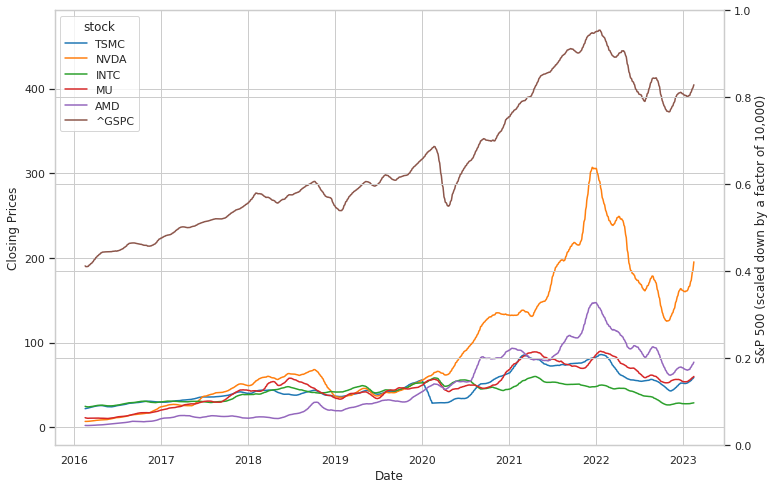

In [ ]:
# Analysis 1.2

# Set seaborn style

semi_stock_data = stock_data
stocks = ['TSMC', 'NVDA', 'INTC', 'MU', 'AMD', '^GSPC']
semi_stock_data = semi_stock_data.loc[:, stocks].rolling(30).mean()
semi_stock_data['^GSPC'] = semi_stock_data['^GSPC']/10
semi_stock_data = semi_stock_data.reset_index().melt(id_vars='Date', var_name='stock', value_name='Closing Prices')

# Defining the colors for each stock
colors = {'TSMC': '#1f77b4', 'NVDA': '#ff7f0e', 'INTC': '#2ca02c', 'MU': '#d62728', 'AMD': '#9467bd', '^GSPC': '#8c564b'}

# Create the plot with Seaborn's lineplot function

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='Date', y='Closing Prices', hue='stock', data=semi_stock_data, palette=colors)

plt2 = plt.twinx()

# Set the limits of the secondary y-axis to match the original y-axis
plt2.set_ylim(plt.ylim())

# Set the label of the secondary y-axis
plt2.set_ylabel('S&P 500 (scaled down by a factor of 10,000)')

# Show the plot
plt.show()

In [ ]:
# The financials are collected using the data from the company's official financial statements

Intel_financials = pd.read_excel('DTM-BA-Financial Report Intel (1).xlsx', sheet_name='Intel', usecols=['Consolidated Statements of Income - USD ($) shares in Millions, $ in Millions','12 Months Ended', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8'])
Intel_financials = Intel_financials.rename(columns={'12 Months Ended': '2022-12-31', 'Unnamed: 2': '2021-12-25', 'Unnamed: 3': '2020-12-26', 'Unnamed: 4': '2019-12-28', 'Unnamed: 5': '2018-12-29', 'Unnamed: 6': '2017-12-30', 'Unnamed: 8': '2016-12-31'})
Intel_financials = Intel_financials.dropna().reset_index(drop=True).T

TSMC_financials = pd.read_excel('DTM-BA-Financial Report Intel (1).xlsx', sheet_name='TSMC- Final Correct', skiprows=1)
TSMC_financials = TSMC_financials.dropna().T

MU_financials = pd.read_excel('DTM-BA-Financial Report Intel (1).xlsx', sheet_name='MU')
MU_financials = MU_financials.dropna().reset_index(drop=True).drop('Unnamed: 0', axis=1).T

AMD_financials = pd.read_excel('DTM-BA-Financial Report Intel (1).xlsx', sheet_name='AMD')
AMD_financials = AMD_financials[2:].drop('Consolidated Statements of Income - USD ($) shares in Millions, $ in Millions', axis=1).rename(columns={'Quarter Group':'Consolidated Statements of Income - USD ($) shares in Millions, $ in Millions', 'Year Ended':'2022-12-31', 'Unnamed: 3':'2021-12-25', 'Unnamed: 4': '2020-12-26', 'Unnamed: 5': '2019-12-28', 'Unnamed: 6': '2018-12-29', 'Unnamed: 7': '2017-12-30', 'Unnamed: 8': '2016-12-31'}).dropna().reset_index(drop=True).T

NVDA_financials = pd.read_excel('DTM-BA-Financial Report Intel (1).xlsx', sheet_name='Nvidia', skiprows=2)
NVDA_financials = NVDA_financials.dropna().reset_index(drop=True).T

Here we'll be comparing the following KPIs: Net revenue, Expenditure, and Gross profit of TSMC, Nvidia, Intel, AMD, and MU

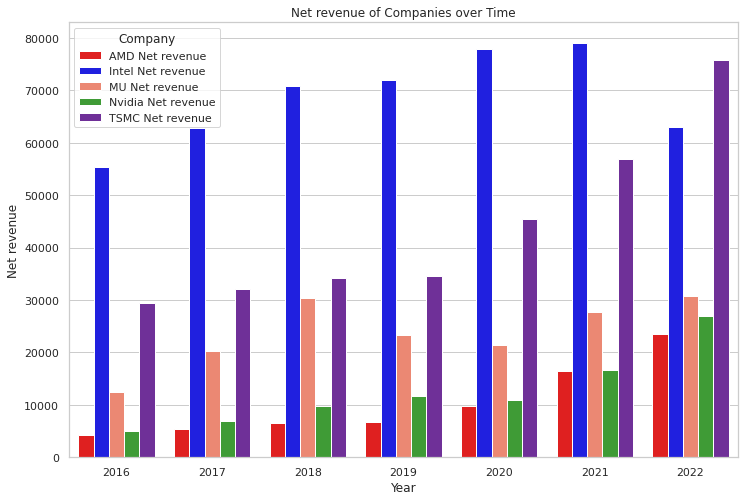

,Year,AMD Net revenue,AMD Expenditure,AMD Gross profit,TSMC Net revenue,TSMC Expenditure,TSMC Gross profit,Intel Net revenue,Intel Expenditure,Intel Gross profit,Nvidia Net revenue,Nvidia Expenditure,Nvidia Gross profit,MU Net revenue,MU Expenditure,MU Gross profit
0,2022,"23,601.0","11,550.0","10,603.0","75,881.0","30,687.0","45,194.0","63,054.0","36,188.0","26,866.0","26,914.0","9,439.0","17,475.0","30,758.0","16,860.0","13,898.0"
1,2021,"16,434.0","8,505.0","7,929.0","56,822.0","27,487.0","29,335.0","79,024.0","35,209.0","43,815.0","16,675.0","6,279.0","10,396.0","27,705.0","17,282.0","10,423.0"
2,2020,"9,763.0","5,416.0","4,347.0","45,505.0","21,342.0","24,163.0","77,867.0","34,255.0","43,612.0","10,918.0","4,150.0","6,768.0","21,435.0","14,883.0","6,552.0"
3,2019,"6,731.0","3,863.0","2,868.0","34,632.0","18,684.0","15,948.0","71,965.0","29,825.0","42,140.0","11,716.0","4,545.0","7,171.0","23,406.0","12,704.0","10,702.0"
4,2018,"6,475.0","4,028.0","2,447.0","34,196.0","17,690.0","16,506.0","70,848.0","27,111.0","43,737.0","9,714.0","3,892.0","5,822.0","30,391.0","12,500.0","17,891.0"
5,2017,"5,329.0","3,506.0","1,823.0","32,105.0","15,852.0","16,253.0","62,761.0","23,692.0","39,069.0","6,910.0","2,847.0","4,063.0","20,322.0","11,886.0","8,436.0"
6,2016,"4,272.0","3,274.0",998.0,"29,434.0","14,690.0","14,744.0","55,355.0","20,676.0","34,679.0","5,010.0","2,199.0","2,811.0","12,399.0","9,894.0","2,505.0"


In [ ]:
# Analysis 1.3.1
from pandas.core.internals.construction import treat_as_nested

# Define the range of dates you want to use

dates = pd.date_range(start='2016-01-01', end='2022-12-31', freq='Y')

# Create a dataframe with the dates as the index

df = pd.DataFrame(index=dates)
df = df.iloc[::-1]

# Add your columns to the dataframe and do some Data Engineering 

df['AMD Net revenue'] = AMD_financials[0].values[1:].astype(float)
df['AMD Expenditure'] = AMD_financials[1].values[1:].astype(float)
df['AMD Gross profit'] = AMD_financials[2].values[1:].astype(float)

df['TSMC Net revenue'] = TSMC_financials[1].values[1:8].astype(float)
df['TSMC Expenditure'] = TSMC_financials[2].values[1:8].astype(float)
df['TSMC Expenditure'] = - df['TSMC Expenditure']
df['TSMC Gross profit'] = TSMC_financials[3].values[1:8].astype(float)

df['Intel Net revenue'] = Intel_financials[0].values[1:].astype(float)
df['Intel Expenditure'] = Intel_financials[1].values[1:].astype(float)
df['Intel Gross profit'] = Intel_financials[2].values[1:].astype(float)

df['Nvidia Net revenue'] = NVDA_financials[0].values[1:8].astype(float)
df['Nvidia Expenditure'] = NVDA_financials[1].values[1:8].astype(float)
df['Nvidia Gross profit'] = NVDA_financials[2].values[1:8].astype(float)

df['MU Net revenue'] = MU_financials[0].values[1:].astype(float)
df['MU Expenditure'] = MU_financials[1].values[1:].astype(float)
df['MU Gross profit'] = MU_financials[2].values[1:].astype(float)

df = df.reset_index()
df = df.rename(columns={'index':'Year'})
df['Year'] = df['Year'].dt.strftime('%Y')
pivot = df.pivot_table(index='Year', values=['TSMC Net revenue', 'Intel Net revenue', 'AMD Net revenue', 'Nvidia Net revenue', 'MU Net revenue'])

# Reset the index to make the pivot table columns into regular columns
pivot = pivot.reset_index()

# Melt the data to get it into the right format for a grouped bar chart
melted = pivot.melt(id_vars='Year', var_name='Company', value_name='Net revenue')

colors = ['#FF0000','#0000FF','#FF7B5F','#31AC25', '#721FA9']

sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Net revenue', hue='Company', data=melted, palette=colors)
plt.title('Net revenue of Companies over Time')
plt.xlabel('Year')
plt.ylabel('Net revenue')
plt.show()


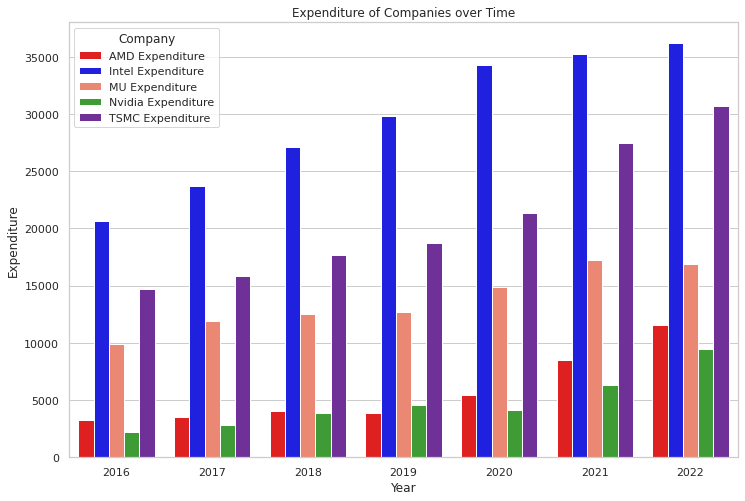

In [ ]:
# Expenditure Comparison of the companies 
# Analysis 1.3.1
pivot = df.pivot_table(index='Year', values=['TSMC Expenditure', 'Intel Expenditure', 'AMD Expenditure', 'Nvidia Expenditure', 'MU Expenditure'])
pivot = pivot.reset_index()
melted = pivot.melt(id_vars='Year', var_name='Company', value_name='Expenditure')

colors = ['#FF0000','#0000FF','#FF7B5F','#31AC25', '#721FA9']

sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Expenditure', hue='Company', data=melted, palette=colors)
plt.title('Expenditure of Companies over Time')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.show()

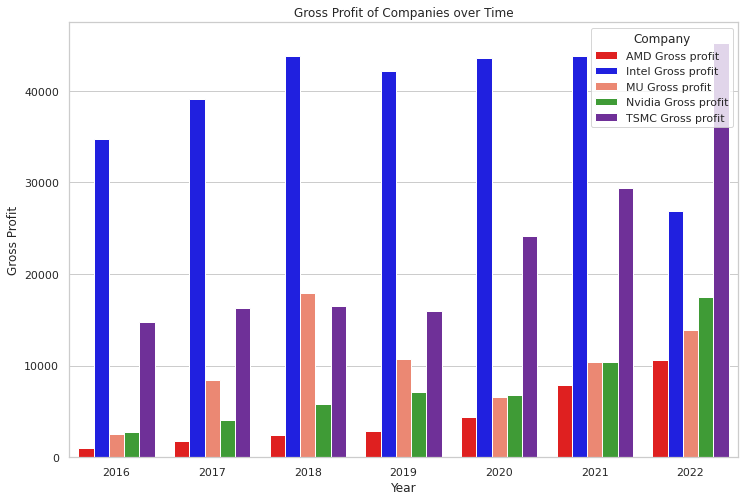

In [ ]:
# Analysis 1.3.1
# Gross Profit comparison 

pivot = df.pivot_table(index='Year', values=['TSMC Gross profit', 'Intel Gross profit', 'AMD Gross profit', 'Nvidia Gross profit', 'MU Gross profit'])
pivot = pivot.reset_index()
melted = pivot.melt(id_vars='Year', var_name='Company', value_name='Gross Profit')

colors = ['#FF0000','#0000FF','#FF7B5F','#31AC25', '#721FA9']

sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Gross Profit', hue='Company', data=melted, palette=colors)
plt.title('Gross Profit of Companies over Time')
plt.xlabel('Year')
plt.ylabel('Gross Profit')
plt.show()

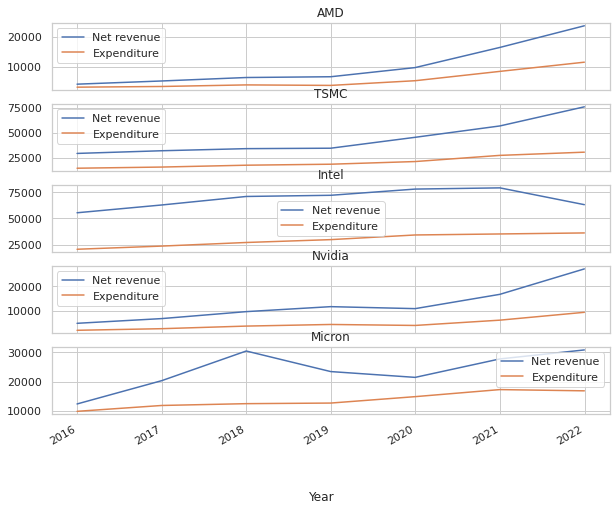

In [ ]:
# Analysis 1.3

df = df.set_index(pd.date_range(start='2015-01-01', end='2021-12-31', freq='Y'))
df = df.iloc[::-1]
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 8), sharex=True)

# Plot the data for each company on its corresponding subplot
axs[0].plot(df.index, df['AMD Net revenue'], label='Net revenue')
axs[0].plot(df.index, df['AMD Expenditure'], label='Expenditure')
axs[0].set_title('AMD')
axs[0].legend()

axs[1].plot(df.index, df['TSMC Net revenue'], label='Net revenue')
axs[1].plot(df.index, df['TSMC Expenditure'], label='Expenditure')
axs[1].set_title('TSMC')
axs[1].legend()

axs[2].plot(df.index, df['Intel Net revenue'], label='Net revenue')
axs[2].plot(df.index, df['Intel Expenditure'], label='Expenditure')
axs[2].set_title('Intel')
axs[2].legend()

axs[3].plot(df.index, df['Nvidia Net revenue'], label='Net revenue')
axs[3].plot(df.index, df['Nvidia Expenditure'], label='Expenditure')
axs[3].set_title('Nvidia')
axs[3].legend()

axs[4].plot(df.index, df['MU Net revenue'], label='Net revenue')
axs[4].plot(df.index, df['MU Expenditure'], label='Expenditure')
axs[4].set_title('Micron')
axs[4].legend()

# Set the x-axis label and tick format
fig.text(0.5, 0.05, 'Year', ha='center')
fig.autofmt_xdate()

plt.show()
# Run the code twice (caveat)

We'll use correlation analysis to determine the degree to which TSMC's stock price is related to the stock prices of other companies: 
Apple (Tech)  
AMD (Microchips)
Amazon (E-Commerce)  
Intel (Microchips)  
Coca Cola (Consumer)  
Microsoft (IT)  
MU (Microchips)  
Nvidia (Microchips)  
PG&E Corp. (Utilities)  
Schlumberger NV (Energy)  
Warner Bros. Discovery Inc. (Communication Serv.)  
S&P500

This will give us an idea of how much impact TSMC has on the overall semiconductor market, as well as on individual companies within the market.

<ipython-input-365-f6d5bcd37135>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=cmap,


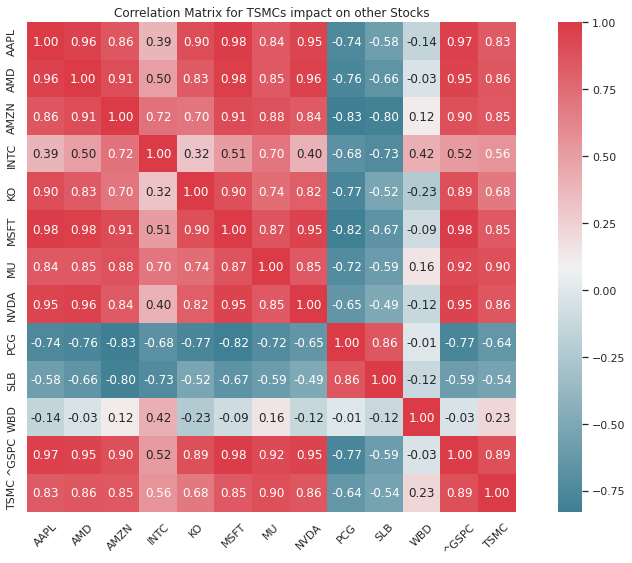

In [ ]:
# Analysis 1.1 

correlation_matrix = stock_data.corr()
fig, ax = plt.subplots(figsize=(15,9))

# Create a custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and aspect ratio
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=cmap,
            square=True, ax=ax, annot=True, fmt='.2f')

# Set the title of the plot
ax.set_title('Correlation Matrix for TSMCs impact on other Stocks')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

To further check the accuracy of the correlation analysis, we're taking out the p-values. 

In [ ]:
p_matrix = pd.DataFrame(index=correlation_matrix.columns, columns=correlation_matrix.columns)

# Calculate the p-values
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        corr, p = pearsonr(stock_data[col1], stock_data[col2])
        p_matrix.loc[col1, col2] = p

def format_pval(pval):
    if pval < 0.001:
        return '<0.001'
    else:
        return '{:.3f}'.format(pval)

p_values_formatted = p_matrix.applymap(format_pval)

p_values_formatted

,AAPL,AMD,AMZN,INTC,KO,MSFT,MU,NVDA,PCG,SLB,WBD,^GSPC,TSMC
AAPL,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
AMD,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,0.208,<0.001,<0.001
AMZN,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
INTC,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
KO,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
MSFT,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
MU,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
NVDA,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001
PCG,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,0.768,<0.001,<0.001
SLB,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001,<0.001


We'll be performing a SARIMAX model to see if there is a trend between the stock prices of TSMC against Inflation and Interest Rates. We'll further use it to forecast the trend of the stock price. 

In [ ]:
# Analysis 1.5

parameters_inflation = ['Month','Energy','Gasoline (all types)', 'Electricity']
interest_rates = pd.read_excel('DFF.xls', sheet_name='Interest', skiprows=10, parse_dates=True)
interest_rates['observation_date'] = pd.to_datetime(interest_rates['observation_date'])
interest_rates = interest_rates.rename(columns={"observation_date": "Date"}).dropna()
interest_rates.set_index('Date', inplace=True)
monthly_interest_rates = interest_rates.resample('M').mean()
inflation = pd.read_excel('DFF.xls', index_col=0, sheet_name='Inflation Rate', parse_dates=True, usecols=parameters_inflation).dropna()
inflation = inflation.dropna().loc['Jan 2016':'Jan 2023'].reset_index()
inflation = inflation.set_index(pd.to_datetime(inflation['Month'])).resample('M').mean()
stock_data = stock_data.asfreq('d', method="pad").copy().resample('M').mean()
newdf = stock_data
newdf = newdf[2:].drop(newdf.index[-1])

# Combine exogenous variables into one dataframe

exog_data = pd.concat([monthly_interest_rates, inflation], axis=1)
exog_data = exog_data.dropna()
exog_data = exog_data.reset_index().rename(columns={'index':'Date'})
exog_data = exog_data.set_index('Date')

# Create SARIMAX model with exogenous variables

endog = newdf['TSMC']
model = sm.tsa.SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12), exog=exog_data)
# Fit the model
TSMC_results = model.fit(maxiter=1000, tol=1e-6)
print(TSMC_results.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(


                                     SARIMAX Results                                      
Dep. Variable:                               TSMC   No. Observations:                   83
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -174.351
Date:                            Wed, 22 Feb 2023   AIC                            366.702
Time:                                    16:24:48   BIC                            386.939
Sample:                                03-31-2016   HQIC                           374.741
                                     - 01-31-2023                                         
Covariance Type:                              opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
DFF                     -0.1060      1.770     -0.060      0.952      -3.575       3.363
Energ

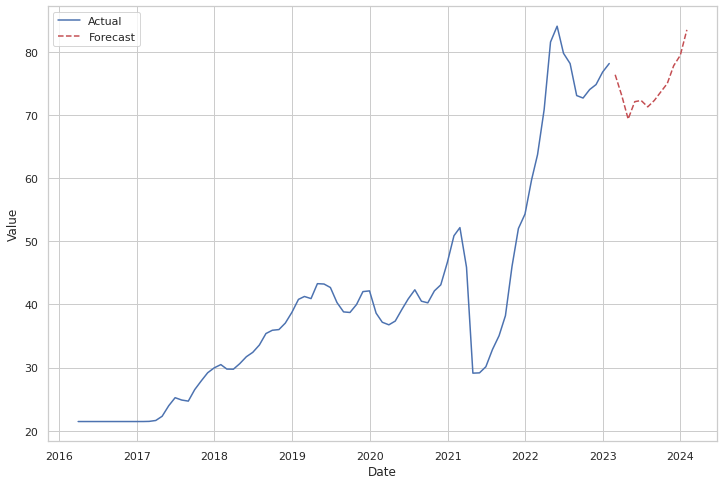

In [ ]:
# Make predictions
# Analysis 1.6
forecast = TSMC_results.forecast(steps=12, exog=exog_data[-12:])

# Plot the forecasted values

fig = plt.figure(figsize=(12,8))

# Plot the actual data as a solid blue line

plt.plot(newdf.index, newdf['TSMC'], 'b-', label='Actual')

# Plot the forecast data as a dashed red line

plt.plot(forecast.index, forecast, 'r--', label='Forecast')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

We'll be taking EMA (Exponential moving Average) along with SMA because EMA focuses on recent observations unlike SMA where it focuses on the entire observations as a whole. For short term investment, EMA is a good strategy to use but for long term, it's better to use SMA.

When the price timeseries crosses the EMA timeseries from  below, we will close any existing short position and go long (buy) one unit of the asset.

When the price timeseries crosses the EMA timeseries       from above, we will close any existing long position and go short (sell) one unit of the asset.

Text(0, 0.5, 'Price in $ for TSMC')

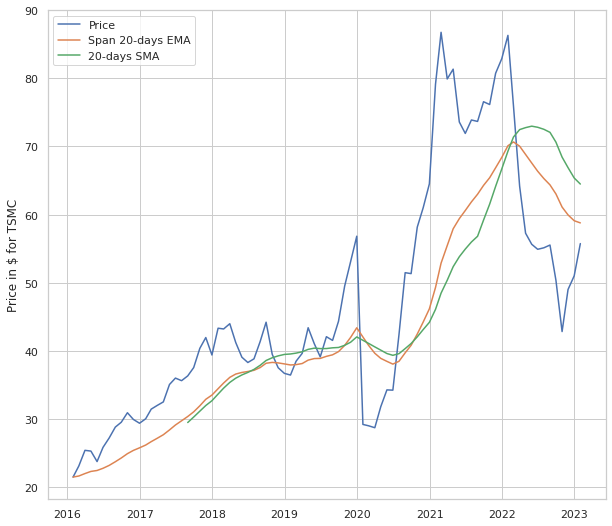

In [ ]:
# Analysis 1.4

short_rolling = stock_data.rolling(window=20).mean()
long_rolling = stock_data.rolling(window=100).mean()
ema_short = stock_data.ewm(span=20, adjust=False).mean()
fig, ax = plt.subplots(figsize=(10,9))
ax.plot(stock_data.loc['2016-01-01':date.today(), :].index, stock_data.loc['2016-01-01':date.today(), 'TSMC'], label='Price')
ax.plot(ema_short.loc['2016-01-01':date.today(), :].index, ema_short.loc['2016-01-01':date.today(), 'TSMC'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc['2016-01-01':date.today(), :].index, short_rolling.loc['2016-01-01':date.today(), 'TSMC'], label = '20-days SMA')
ax.legend(loc='best')
ax.set_ylabel('Price in $ for TSMC')